# EDA

In [1]:
import pandas as pd
import os
import sys
import pprint
import matplotlib.pyplot as plt
import scipy.stats as scistat
import math
import seaborn as sns
import basicdescriptives_mod as bd

In [2]:
current_dir = os.getcwd() # Obtener la ruta del directorio actual del notebook
ROOT_PATH = os.path.dirname(current_dir) # Obtener la ruta del directorio superior
sys.path.insert(1, ROOT_PATH) # Insertar la ruta en sys.path

import root # Importar el módulo root

df_path = root.DIR_DATA_RAW + 'db_v0.xlsx'

## Carga de dataset y exploracion inicial de columnas

In [3]:
df = pd.read_excel(df_path)
df.head()

,ID_USUARIO,ID CREDITO,PRODUCTO,MONEDA,CUOTAS,PERIODICIDAD CUOTAS,PLAZO,TASA CORRIENTE,TASA SEGURO,TASA AVAL,...,GASTOS MENSUALES,INGRESOS ADICIONALES,TIPO DE CONTRATO,PERIODO DE PAGO,ESTADO CIVIL,NIVEL EDUCATIVO,PERSONAS A CARGO,NUMERO DE HIJOS,TIPO DE VEHICULO,TIEMPO TRABAJO
0,1,136,CREDI-ONE,COP,1,9,9,0.01877,0.0024,0,...,NaN,NaN,Indefinido,Mensual,NaN,NaN,0.0,0.0,Ninguno,24 meses
1,2,133,CREDI-ONE,COP,1,14,14,0.01877,0.0024,0,...,NaN,NaN,Indefinido,Mensual,NaN,NaN,0.0,0.0,Ninguno,12 meses
2,3,45,CREDI-ONE,COP,1,30,30,0.01877,0.0024,0,...,NaN,NaN,Termino fijo,Mensual,NaN,NaN,0.0,0.0,Carro,1 año
3,4,78,CREDI-ONE,COP,1,29,29,0.01877,0.0024,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,Ninguno,NaN
4,5,114,CREDI-ONE,COP,1,28,28,0.01877,0.0024,0,...,NaN,NaN,Termino fijo,Mensual,NaN,NaN,1.0,1.0,Ninguno,9 horas


## Resumen del dataset crudo

El dataset contiene 119.243 registros y 60 caracteristicas.

El dataset contiene datos de clientes que han solicitado creditos, los datos incluyen información financiera y socio-demográfica. El objetivo es predecir si un cliente es un buen candidato para un préstamo o no, utilizando las características disponibles en los datos. Esto puede ser útil para los prestamistas para evaluar el riesgo de otorgar un préstamo a un cliente en particular y tomar decisiones informadas sobre la aprobación de préstamos.

Algunas de las características incluidas en el dataset son:

- ID Credito
- ID Usuario anonimizado
- Edad
- Ingresos anuales
- Ocupacion
- Estado civil

El total de los registros corresponden a 23948 clientes y se tienen 3249 ID de credito duplicados

In [4]:
info_df = bd.info(df)
print(info_df)

Number of Columns: 60
Number of total rows: 119243
Number of Unique Rows: 119243
             Column Name Data Type  Non null values  Unique Values
0             ID_USUARIO     int64           119243          23948
1             ID CREDITO     int64           119243         115994
2               PRODUCTO    object           119243              1
3                 MONEDA    object           119243              1
4                 CUOTAS     int64           119243              1
5    PERIODICIDAD CUOTAS     int64           119243             30
6                  PLAZO     int64           119243             30
7         TASA CORRIENTE   float64           119243              2
8            TASA SEGURO   float64           119243              1
9              TASA AVAL     int64           119243              1
10              IVA AVAL     int64           119243              1
11             DESC AVAL     int64           119243              1
12   DESC AVAL AL DESEMB     int64           119

## Columnas con datos nulos

In [5]:
cols_with_nan = [col for col in df.columns if df[col].isnull().any()]
round(df[cols_with_nan].isnull().sum()/len(df)*100,2)

GESTIÓN DIGITAL.2       88.68
ESTADO 2                94.05
TIPO EMPLEO             96.52
CIUDAD RESIDENCIA       96.53
TRABAJO                 96.61
TIPO DE VIVIENDA        97.16
ESTRATO                 96.49
AÑOS EN LA VIVIENDA     96.50
INGRESOS MENSUALES      97.08
GASTOS MENSUALES        97.10
INGRESOS ADICIONALES    98.00
TIPO DE CONTRATO        97.12
PERIODO DE PAGO         97.12
ESTADO CIVIL            97.16
NIVEL EDUCATIVO         97.17
PERSONAS A CARGO        97.66
NUMERO DE HIJOS         97.66
TIPO DE VEHICULO        96.51
TIEMPO TRABAJO          97.10
dtype: float64

In [6]:
cat_cols = [col for col in df[cols_with_nan].select_dtypes(include=['object'])]
round(df[cat_cols].isnull().sum()/len(df)*100,2)

ESTADO 2               94.05
TIPO EMPLEO            96.52
CIUDAD RESIDENCIA      96.53
TRABAJO                96.61
TIPO DE VIVIENDA       97.16
AÑOS EN LA VIVIENDA    96.50
TIPO DE CONTRATO       97.12
PERIODO DE PAGO        97.12
ESTADO CIVIL           97.16
NIVEL EDUCATIVO        97.17
TIPO DE VEHICULO       96.51
TIEMPO TRABAJO         97.10
dtype: float64

In [7]:
num_cols = [col for col in df[cols_with_nan].select_dtypes(exclude=['object'])]
round(df[num_cols].isnull().sum()/len(df)*100,2)

GESTIÓN DIGITAL.2       88.68
ESTRATO                 96.49
INGRESOS MENSUALES      97.08
GASTOS MENSUALES        97.10
INGRESOS ADICIONALES    98.00
PERSONAS A CARGO        97.66
NUMERO DE HIJOS         97.66
dtype: float64

## Columnas con  valor unico

In [8]:
# Filtrado columnas sin varianza, 'Unique Values' == 1
df_filtered_uniqueV = info_df[info_df['Unique Values'] == 1]

print(df_filtered_uniqueV)

            Column Name Data Type  Non null values  Unique Values
2              PRODUCTO    object           119243              1
3                MONEDA    object           119243              1
4                CUOTAS     int64           119243              1
8           TASA SEGURO   float64           119243              1
9             TASA AVAL     int64           119243              1
10             IVA AVAL     int64           119243              1
11            DESC AVAL     int64           119243              1
12  DESC AVAL AL DESEMB     int64           119243              1
13      GESTIÓN DIGITAL   float64           119243              1
14    DESC. X INCLUSION     int64           119243              1
15         IVA GEST DIG   float64           119243              1
16     COD. PROMO DESC.     int64           119243              1
17        FACTURA VENTA     int64           119243              1
21    GESTIÓN DIGITAL.1   float64           119243              1
22        

## Usuarios con multiples creditos

In [9]:
duplicated_ids = df['ID_USUARIO'][df['ID_USUARIO'].duplicated(keep=False)]

# Filtramos el DataFrame para mostrar solo los ID USUARIO duplicados
duplicated_df = df[df['ID_USUARIO'].isin(duplicated_ids)]

grouped_df = duplicated_df.groupby('ID_USUARIO').apply(lambda x: x).reset_index(drop=True)

grouped_df.head()


C:\Users\jgome\AppData\Local\Temp\ipykernel_14308\1488647403.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = duplicated_df.groupby('ID_USUARIO').apply(lambda x: x).reset_index(drop=True)


,ID_USUARIO,ID CREDITO,PRODUCTO,MONEDA,CUOTAS,PERIODICIDAD CUOTAS,PLAZO,TASA CORRIENTE,TASA SEGURO,TASA AVAL,...,GASTOS MENSUALES,INGRESOS ADICIONALES,TIPO DE CONTRATO,PERIODO DE PAGO,ESTADO CIVIL,NIVEL EDUCATIVO,PERSONAS A CARGO,NUMERO DE HIJOS,TIPO DE VEHICULO,TIEMPO TRABAJO
0,101,326,CREDI-ONE,COP,1,24,24,0.01877,0.0024,0,...,600000.0,NaN,Indefinido,Quincenal,Soltero/a,Profesional,NaN,NaN,Moto,2018-05-08
1,101,83,CREDI-ONE,COP,1,14,14,0.01877,0.0024,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,111,439,CREDI-ONE,COP,1,30,30,0.01877,0.0024,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111,201,CREDI-ONE,COP,1,30,30,0.01877,0.0024,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,113,451,CREDI-ONE,COP,1,30,30,0.01877,0.0024,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
credits_per_user = df.groupby('ID_USUARIO')['ID CREDITO'].apply(list).reset_index(name='ID CREDITO')
# Filter users with more than one credit
users_with_multiple_credits = credits_per_user[credits_per_user['ID CREDITO'].apply(len) > 1]
print(users_with_multiple_credits)

       ID_USUARIO                    ID CREDITO
100           101                     [326, 83]
110           111                    [439, 201]
112           113                    [451, 418]
119           120                    [563, 386]
122           123                    [612, 397]
...           ...                           ...
23897       23898              [412560, 419097]
23920       23921                [73402, 77786]
23922       23923  [75727, 81364, 89934, 96723]
23923       23924                [75837, 87344]
23932       23933                [81354, 91274]

[13861 rows x 2 columns]


## Creditos con mulptiples usuarios

In [11]:
user_per_credit = df.groupby('ID CREDITO')['ID_USUARIO'].apply(list).reset_index(name='ID_USUARIO')
# Filter users with more than one credit
credits_with_multiple_users = user_per_credit[user_per_credit['ID_USUARIO'].apply(len) > 1]
print(credits_with_multiple_users)

       ID CREDITO      ID_USUARIO
3              44       [97, 130]
8              64    [108, 23412]
23            114       [5, 3661]
27            133      [2, 18014]
28            136      [1, 21654]
...           ...             ...
41525       96074  [22452, 13370]
41530       96081  [15578, 20428]
41580       96153   [4184, 18562]
41587       96160   [6441, 20464]
41588       96162  [13980, 22013]

[3249 rows x 2 columns]


## Distribucion de los datos

In [12]:
num_cols = [col for col in df.select_dtypes(exclude=['object'])]
df[num_cols].describe()

,ID_USUARIO,ID CREDITO,CUOTAS,PERIODICIDAD CUOTAS,PLAZO,TASA CORRIENTE,TASA SEGURO,TASA AVAL,IVA AVAL,DESC AVAL,...,Cuotas en mora,Cuotas Futuras,DEUDA A LA FECHA,DEUDA TOTAL CRÉDITO,ESTRATO,INGRESOS MENSUALES,GASTOS MENSUALES,INGRESOS ADICIONALES,PERSONAS A CARGO,NUMERO DE HIJOS
count,119243.000000,119243.000000,119243.0,119243.000000,119243.000000,119243.000000,1.192430e+05,119243.0,119243.0,119243.0,...,119243.000000,119243.000000,1.192430e+05,1.192430e+05,4180.000000,3.478000e+03,3.457000e+03,2.388000e+03,2792.000000,2789.000000
mean,13818.585938,186732.811813,1.0,29.459432,29.459432,0.019283,2.400000e-03,0.0,0.0,0.0,...,0.099863,0.013326,8.423808e+04,8.423808e+04,2.656699,2.601234e+06,8.661259e+05,4.441893e+05,1.295487,1.354249
std,6297.180564,130948.382459,0.0,2.580939,2.580939,0.001488,1.101120e-15,0.0,0.0,0.0,...,0.299819,0.114666,2.550308e+05,2.550308e+05,0.850990,2.341523e+07,2.721038e+06,6.662604e+05,0.883225,0.910642
min,1.000000,38.000000,1.0,3.000000,3.000000,0.018770,2.400000e-03,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,8.000000e+02,1.000000e+02,0.000000e+00,0.000000,0.000000
25%,8750.000000,70988.500000,1.0,30.000000,30.000000,0.018770,2.400000e-03,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000,1.200000e+06,4.000000e+05,1.500000e+05,1.000000,1.000000
50%,14362.000000,176006.000000,1.0,30.000000,30.000000,0.018770,2.400000e-03,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000000,1.600000e+06,6.000000e+05,3.000000e+05,1.000000,1.000000
75%,19398.000000,301105.500000,1.0,30.000000,30.000000,0.018770,2.400000e-03,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000000,2.400000e+06,1.000000e+06,5.000000e+05,2.000000,2.000000
max,23948.000000,425473.000000,1.0,45.000000,45.000000,0.023600,2.400000e-03,0.0,0.0,0.0,...,1.000000,1.000000,2.376326e+06,2.376326e+06,7.000000,1.358000e+09,1.500000e+08,1.500000e+07,6.000000,5.000000


<Axes: xlabel='Cuotas en mora', ylabel='count'>

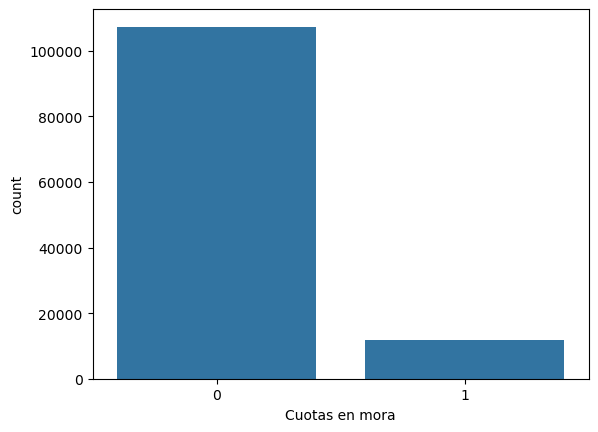

In [13]:
frecuencia = pd.DataFrame(df['Cuotas en mora'].value_counts()).reset_index()
sns.barplot(frecuencia,x='Cuotas en mora',y='count')

<Axes: xlabel='CAPITAL', ylabel='Count'>

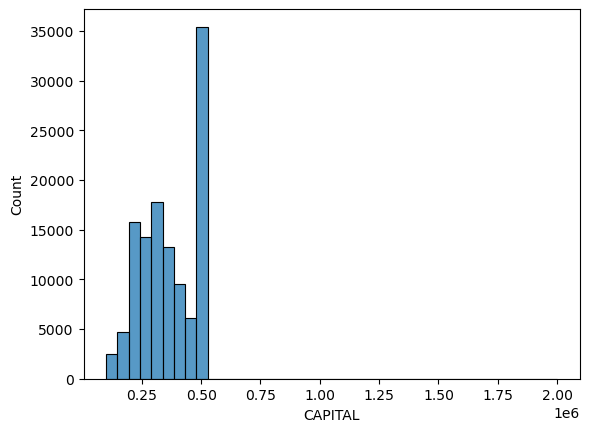

In [14]:
sns.histplot(df,x='CAPITAL',bins=40)

<Axes: xlabel='INGRESOS MENSUALES', ylabel='Count'>

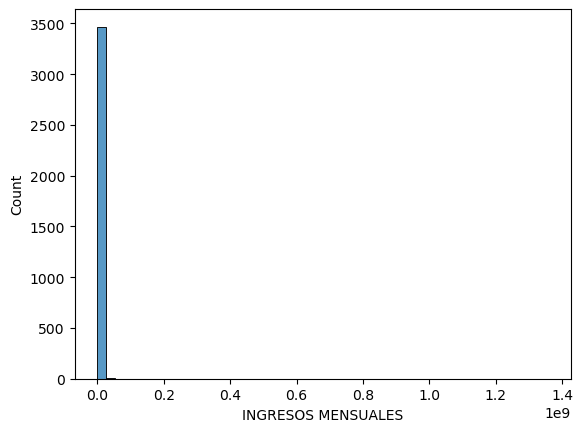

In [15]:
sns.histplot(df,x='INGRESOS MENSUALES', bins = 50)

In [18]:
df['INGRESOS MENSUALES'].nlargest(10)/1000000

2032    1358.000000
946      150.000000
3279     125.000000
2719     100.427500
1943      86.578657
8073      35.500000
8113      35.500000
663       35.000000
1926      35.000000
4046      30.000000
Name: INGRESOS MENSUALES, dtype: float64

In [22]:
df['INGRESOS MENSUALES'].nsmallest(15)/1000000

813     0.000800
1001    0.000800
1098    0.000800
2040    0.000800
704     0.000807
792     0.000850
2732    0.000860
2507    0.000890
1422    0.000900
3200    0.000926
2963    0.000950
2426    0.001300
952     0.001350
700     0.002000
5293    0.098314
Name: INGRESOS MENSUALES, dtype: float64

In [27]:
count_greater_than_2mill = (df['INGRESOS MENSUALES'] > 10000000).sum()
count_greater_than_2mill

36

In [28]:
count_less_than_10mil = (df['INGRESOS MENSUALES'] < 10000).sum()
count_less_than_10mil

14

<Axes: xlabel='INGRESOS MENSUALES'>

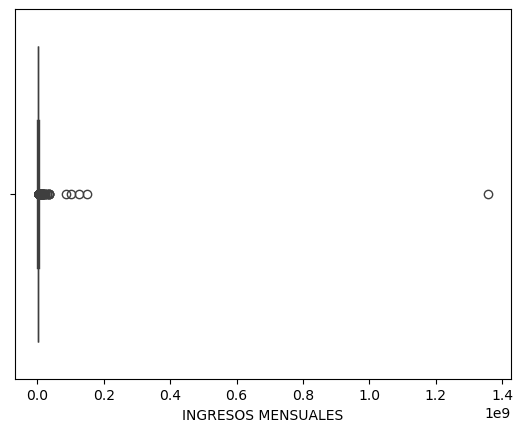

In [29]:
sns.boxplot(df,x='INGRESOS MENSUALES') 

<Axes: xlabel='CAPITAL', ylabel='INGRESOS MENSUALES'>

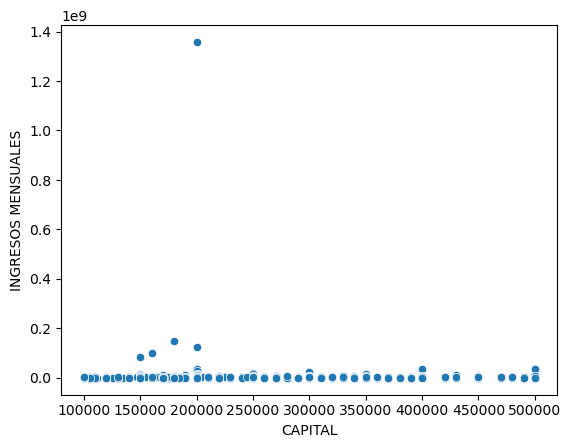

In [30]:
sns.scatterplot(data=df, y='INGRESOS MENSUALES', x='CAPITAL')

In [34]:
cols = df.select_dtypes(exclude=['object']).columns
cols = cols.drop(['CUOTAS','ID_USUARIO', 'ID CREDITO','PERIODICIDAD CUOTAS',
       'TASA CORRIENTE', 'TASA SEGURO', 'TASA AVAL', 'IVA AVAL', 'DESC AVAL',
       'DESC AVAL AL DESEMB', 'GESTIÓN DIGITAL', 'DESC. X INCLUSION',
       'IVA GEST DIG', 'COD. PROMO DESC.', 'FACTURA VENTA', 'CAPITAL',
       'INT CORRIENTE', 'SEGURO', 'GESTIÓN DIGITAL.1', 'IVA',
       'VALOR DESEMBOLSADO', 'VALOR FUTURO', 'CAPITAL.1', 'CAPITAL EN MORA',
       'INT CORRIENTE.1', 'SEGURO.1', 'GESTIÓN DIGITAL.2', 'IVA.1',
       'INT MORA', 'GAC', 'Cuotas pagadas',
       'Cuotas Futuras', 'DEUDA A LA FECHA', 'DEUDA TOTAL CRÉDITO',])

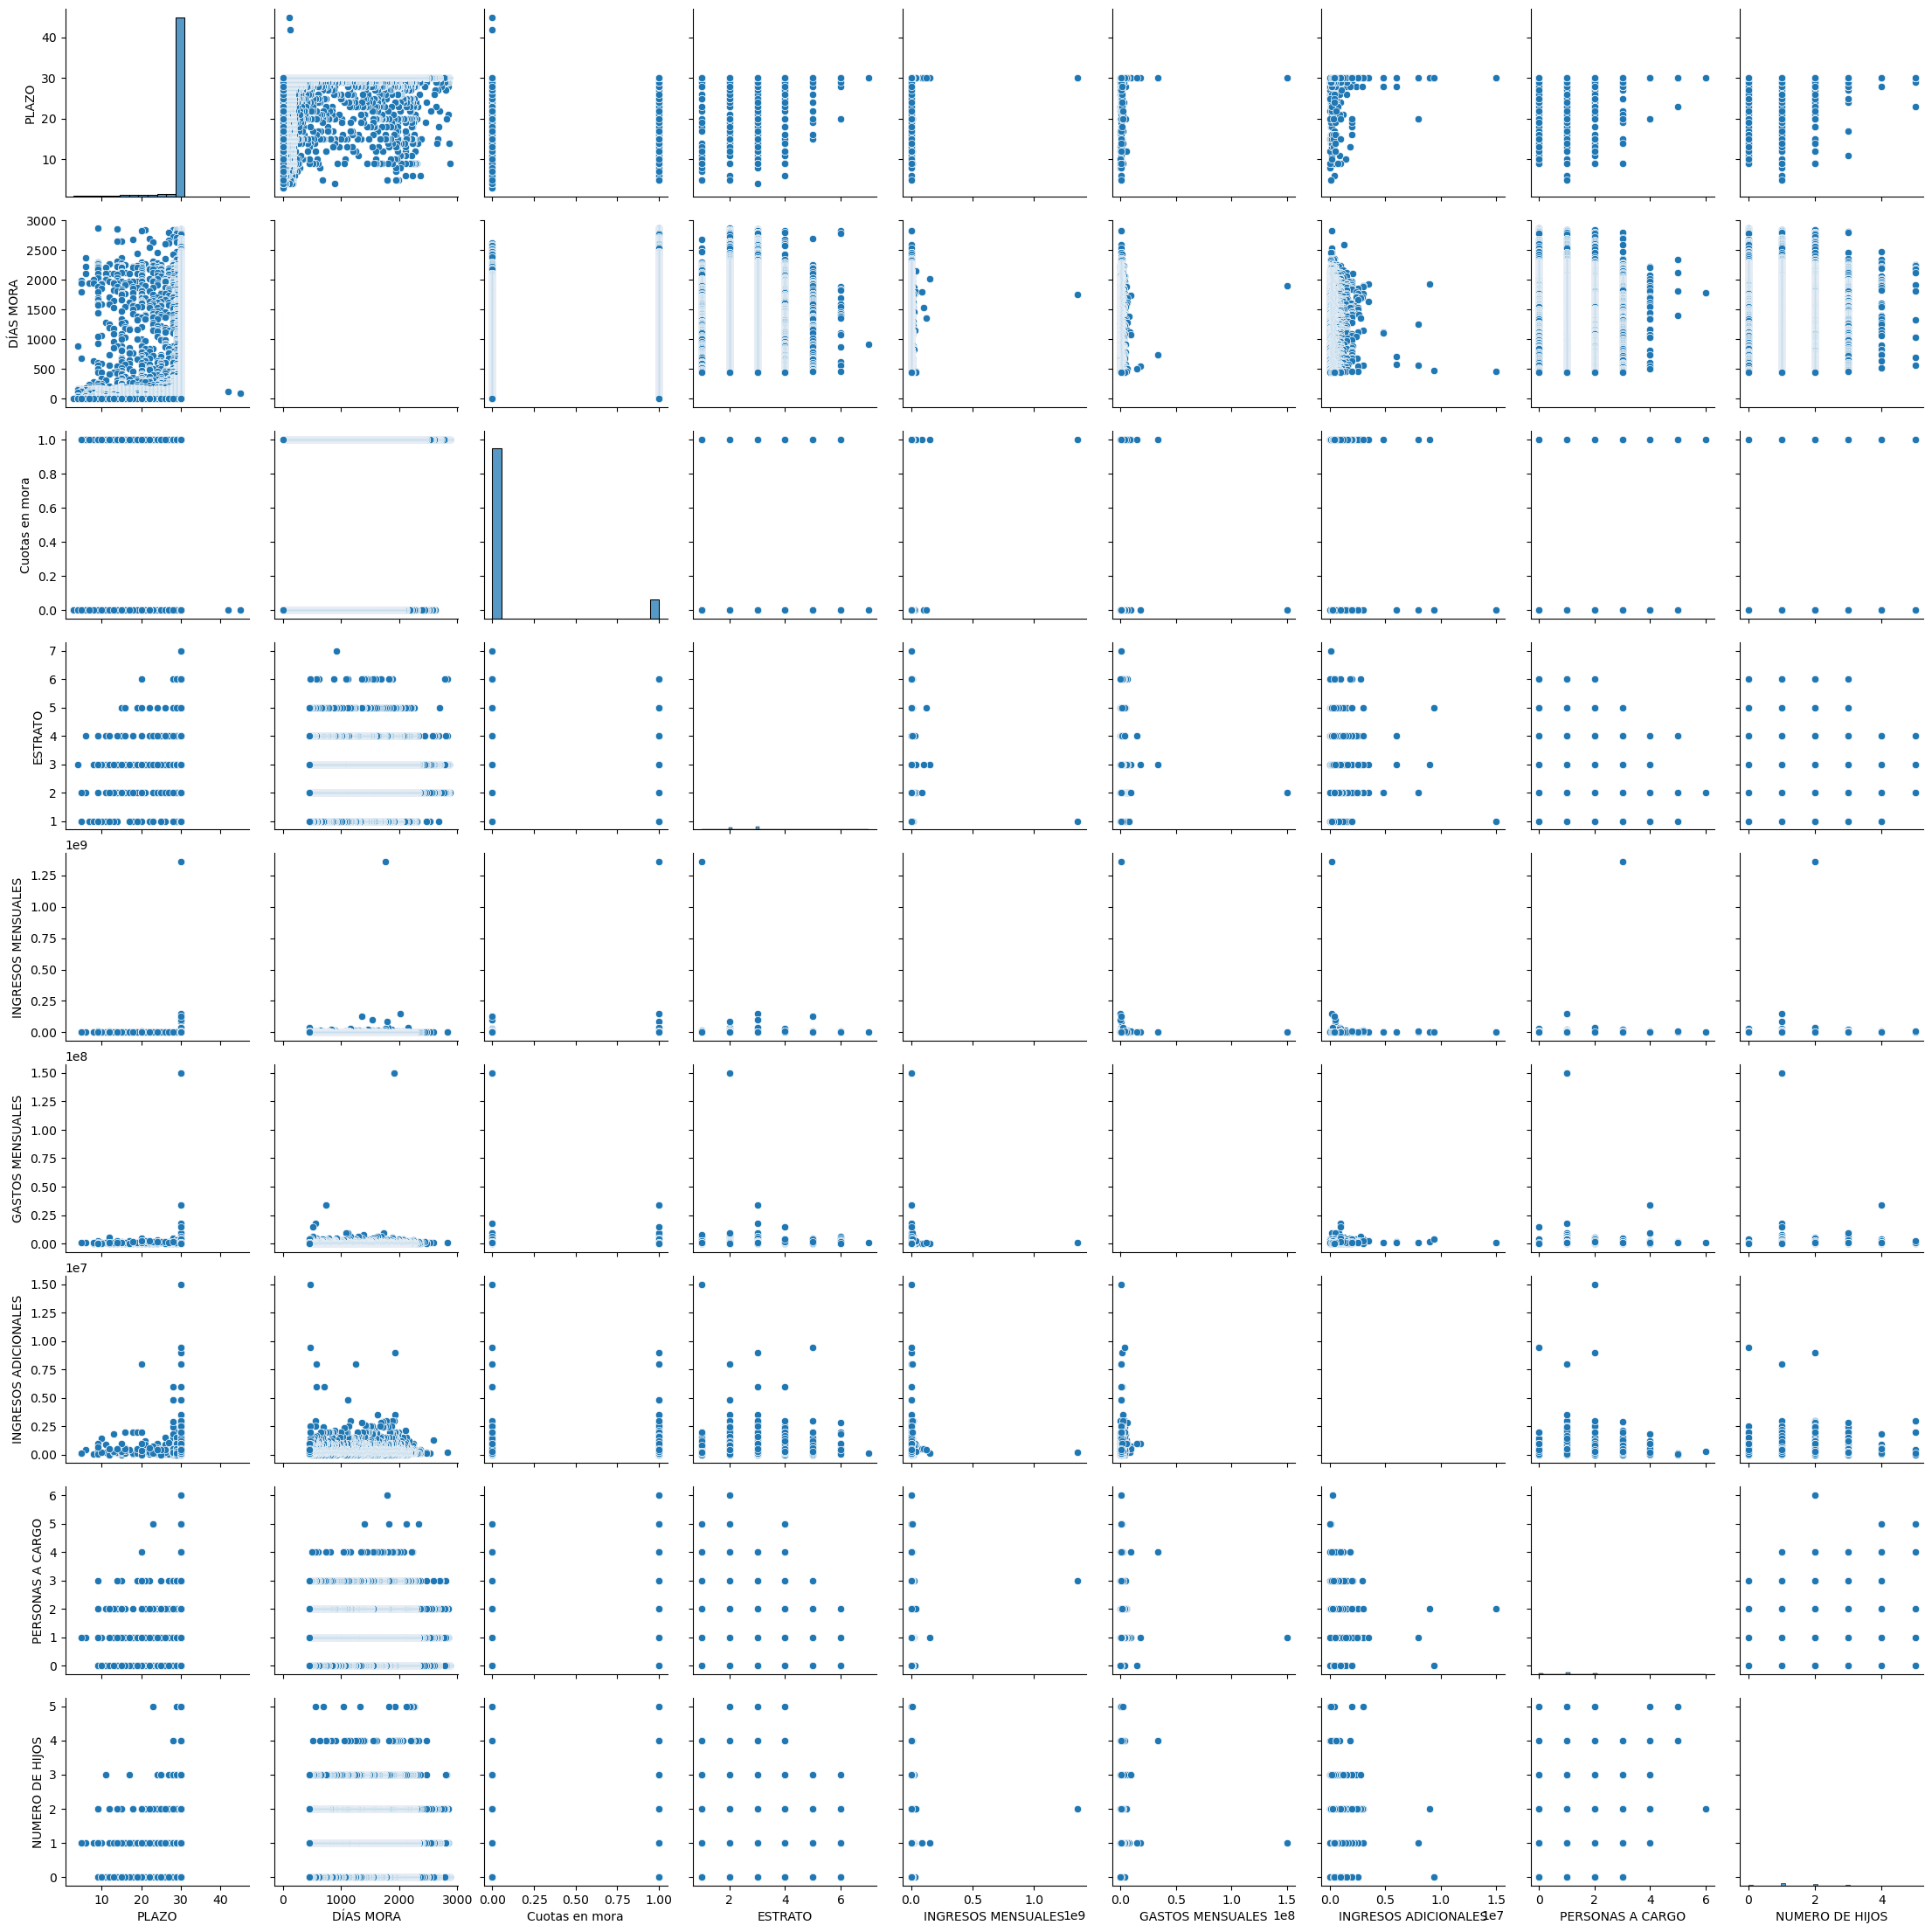

In [35]:
sns.pairplot(df[cols])